# Comparing Assigned clusters across APL and oviIN input, output and full networks
The base code for this came from the modular_sanbox file in Prof G's repo. I adjusted it so it would cycle through the two neuron networks, creating two rows of plots.

In [49]:
# Imports
import os
import time
import pandas as pd
import numpy as np
import networkx as nx
import collections
from scipy import sparse as sp
from scipy.stats import rankdata

import itertools
from itertools import combinations, combinations_with_replacement, cycle
from functools import reduce

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from util import *

import colorcet as cc

In [50]:
# Full network data set up
hemibrain_version = "v1.2.1"
log_msg("Hemibrain data set being used:", hemibrain_version)

preproc_dir = "oviIN/preprocessed-" + hemibrain_version
preproc_dir_APL = "APL/preprocessed-" + hemibrain_version
preproc_nodes = "preprocessed_nodes.csv"
log_msg("Set up directory info and useful lists")

ovi_node_df_full = pd.read_csv(os.path.join(preproc_dir, preproc_nodes), index_col=0)
ovi_node_df_full["type_group"] = ovi_node_df_full["celltype"].apply(simplify_type)

apl_node_df_full = pd.read_csv(os.path.join(preproc_dir_APL, preproc_nodes), index_col=0)
apl_node_df_full["type_group"] = apl_node_df_full["celltype"].apply(simplify_type)

2023 10 24 17:41:06  Hemibrain data set being used: v1.2.1
2023 10 24 17:41:06  Set up directory info and useful lists


In [51]:
# Input network set up
preproc_dir = "oviIN/preprocessed_inputs-" + hemibrain_version
preproc_dir_APL = "APL/preprocessed_inputs-" + hemibrain_version
preproc_nodes = "preprocessed_nodes.csv"
log_msg("Set up directory info and useful lists")

ovi_node_df_in = pd.read_csv(os.path.join(preproc_dir, preproc_nodes), index_col=0)
ovi_node_df_in["type_group"] = ovi_node_df_in["celltype"].apply(simplify_type)

apl_node_df_in = pd.read_csv(os.path.join(preproc_dir_APL, preproc_nodes), index_col=0)
apl_node_df_in["type_group"] = apl_node_df_in["celltype"].apply(simplify_type)

2023 10 24 17:41:06  Set up directory info and useful lists


In [52]:
# Output network set up
preproc_dir = "oviIN/preprocessed_outputs-" + hemibrain_version
preproc_dir_apl = "APL/preprocessed_outputs-" + hemibrain_version
preproc_nodes = "preprocessed_nodes.csv"
log_msg("Set up directory info and useful lists")

ovi_node_df_out = pd.read_csv(os.path.join(preproc_dir, preproc_nodes), index_col=0)
ovi_node_df_out["type_group"] = ovi_node_df_out["celltype"].apply(simplify_type)

apl_node_df_out = pd.read_csv(os.path.join(preproc_dir_apl, preproc_nodes), index_col=0)
apl_node_df_out["type_group"] = apl_node_df_out["celltype"].apply(simplify_type)

2023 10 24 17:41:06  Set up directory info and useful lists


## Creating plots to compare between ovi and apl full connectomes
I adjusted the code from prof G to run through the two connectomes using the correct chi values. The only downside is that the oviIN network was run using 0.05 chi instead of 0.25 chi for each network so it will be hard to compare those graphs (need to fix this soon)

In [53]:
import matplotlib.pyplot as plt

# Creating lists of the data to iterate through
chi_values_ovi = ['0.0','0.05','0.1','0.5','0.75','1.0']
chi_values_apl = ['0.0','0.1','0.25','0.5','0.75','1.0']
chi_vals = np.stack((chi_values_ovi, chi_values_apl))
df_list = [ovi_node_df_full, apl_node_df_full]

# Check chi list
print(chi_vals)

[['0.0' '0.05' '0.1' '0.5' '0.75' '1.0']
 ['0.0' '0.1' '0.25' '0.5' '0.75' '1.0']]


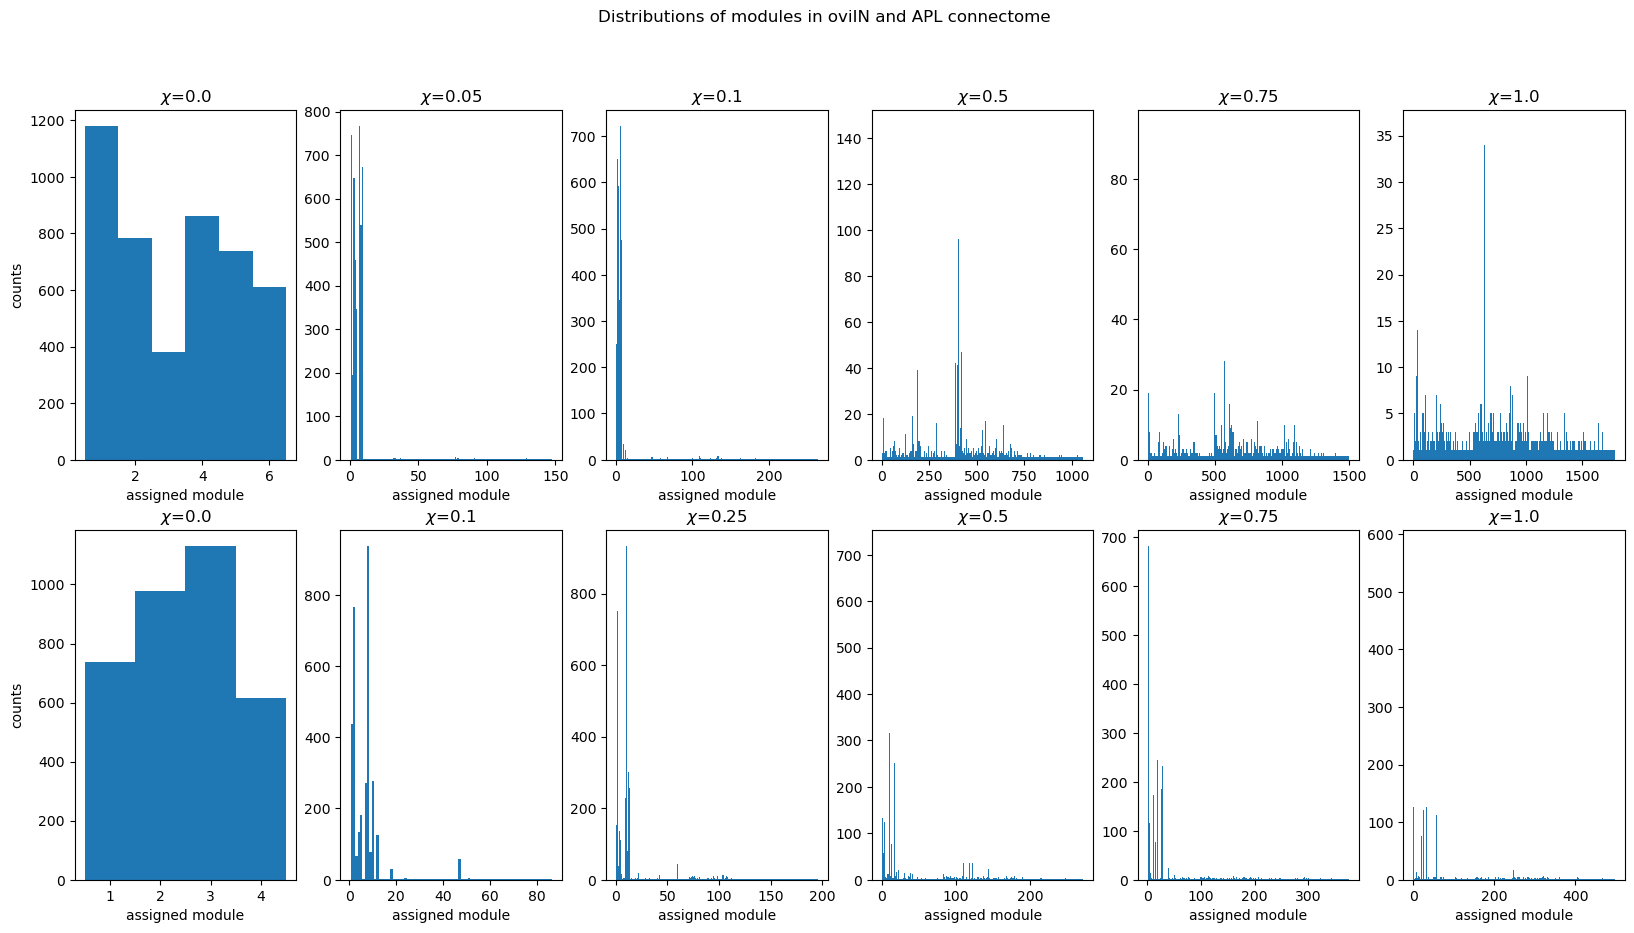

In [54]:
# Outer loop iterates through the number of datasets
# Inner loop iterates through the indexed chi list pulling both the index and the resolution ot use 
fig, axs = plt.subplots(2, len(chi_values_ovi), figsize=(20, 10))
fig.suptitle('Distributions of modules in oviIN and APL connectome')
for i in range(len(df_list)):
    for j, res in enumerate(chi_vals[i]):
        # histogram of module assignments
        axs[i, j].hist(df_list[i][res],bins=range(1, df_list[i][res].max()+2),align='left')

        axs[i, j].set_title('$\chi$=' + str(res))
        axs[i, j].set(xlabel="assigned module")
        

    axs[0, 0].set(ylabel="counts")
    axs[1, 0].set(ylabel="counts")

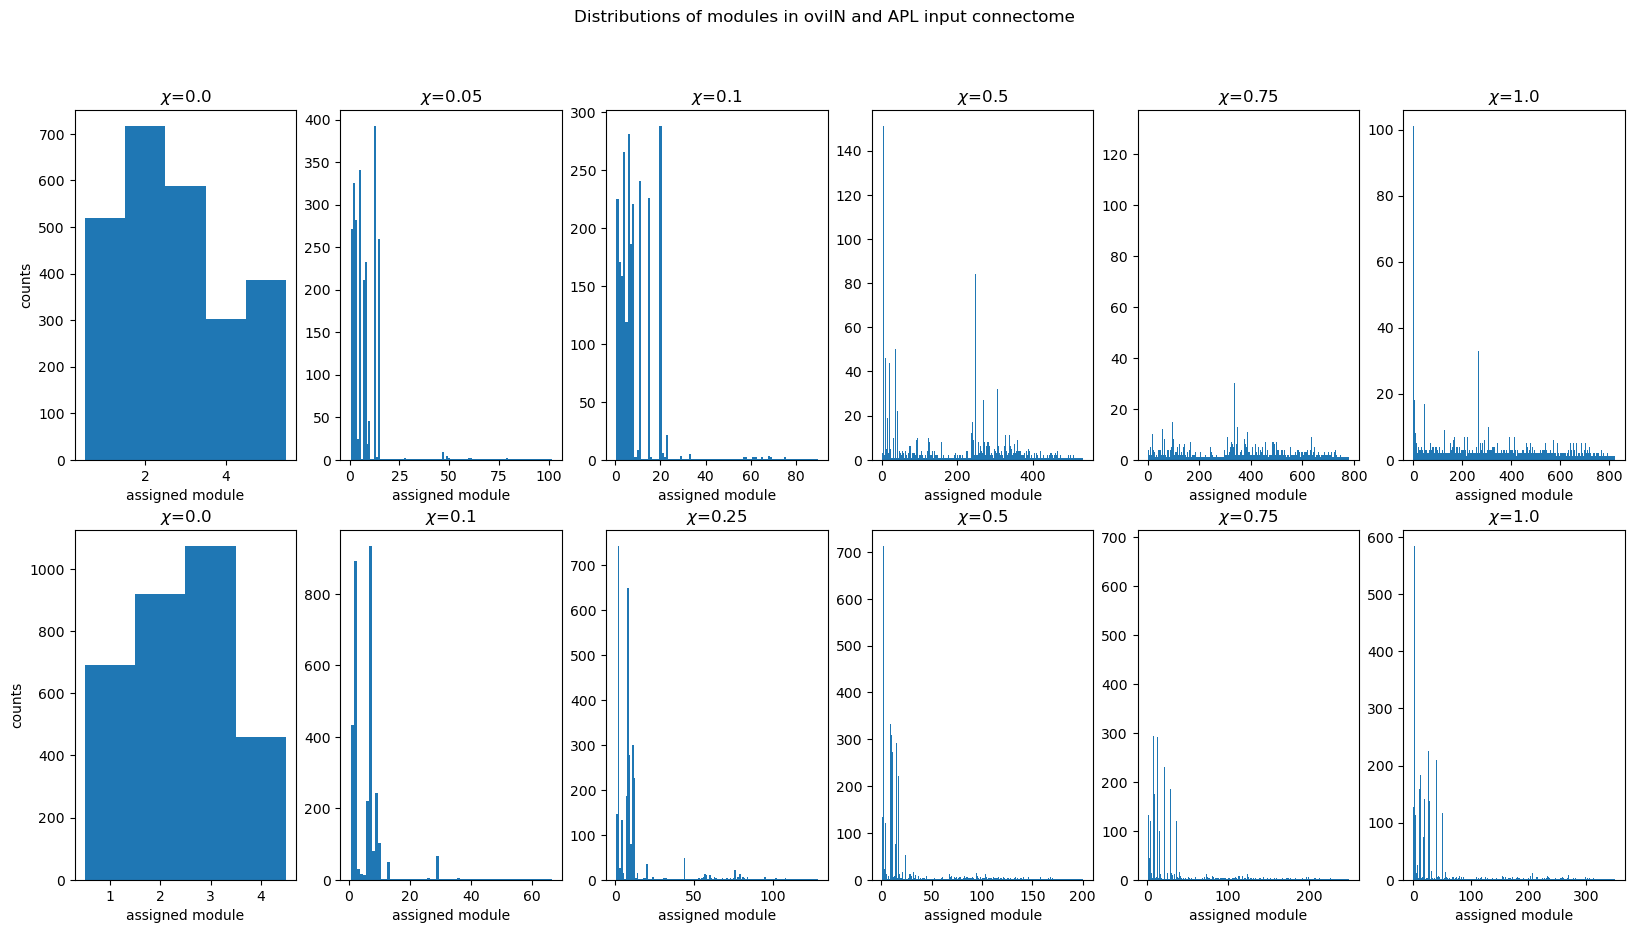

In [55]:
# Repeating for input networks
df_list_in = [ovi_node_df_in, apl_node_df_in]

fig, axs = plt.subplots(2, len(chi_values_ovi), figsize=(20, 10))
fig.suptitle('Distributions of modules in oviIN and APL input connectome')
for i in range(len(df_list_in)):
    for j, res in enumerate(chi_vals[i]):
        # histogram of module assignments
        axs[i, j].hist(df_list_in[i][res],bins=range(1, df_list_in[i][res].max()+2),align='left')

        axs[i, j].set_title('$\chi$=' + str(res))
        axs[i, j].set(xlabel="assigned module")
        

    axs[0, 0].set(ylabel="counts")
    axs[1, 0].set(ylabel="counts")

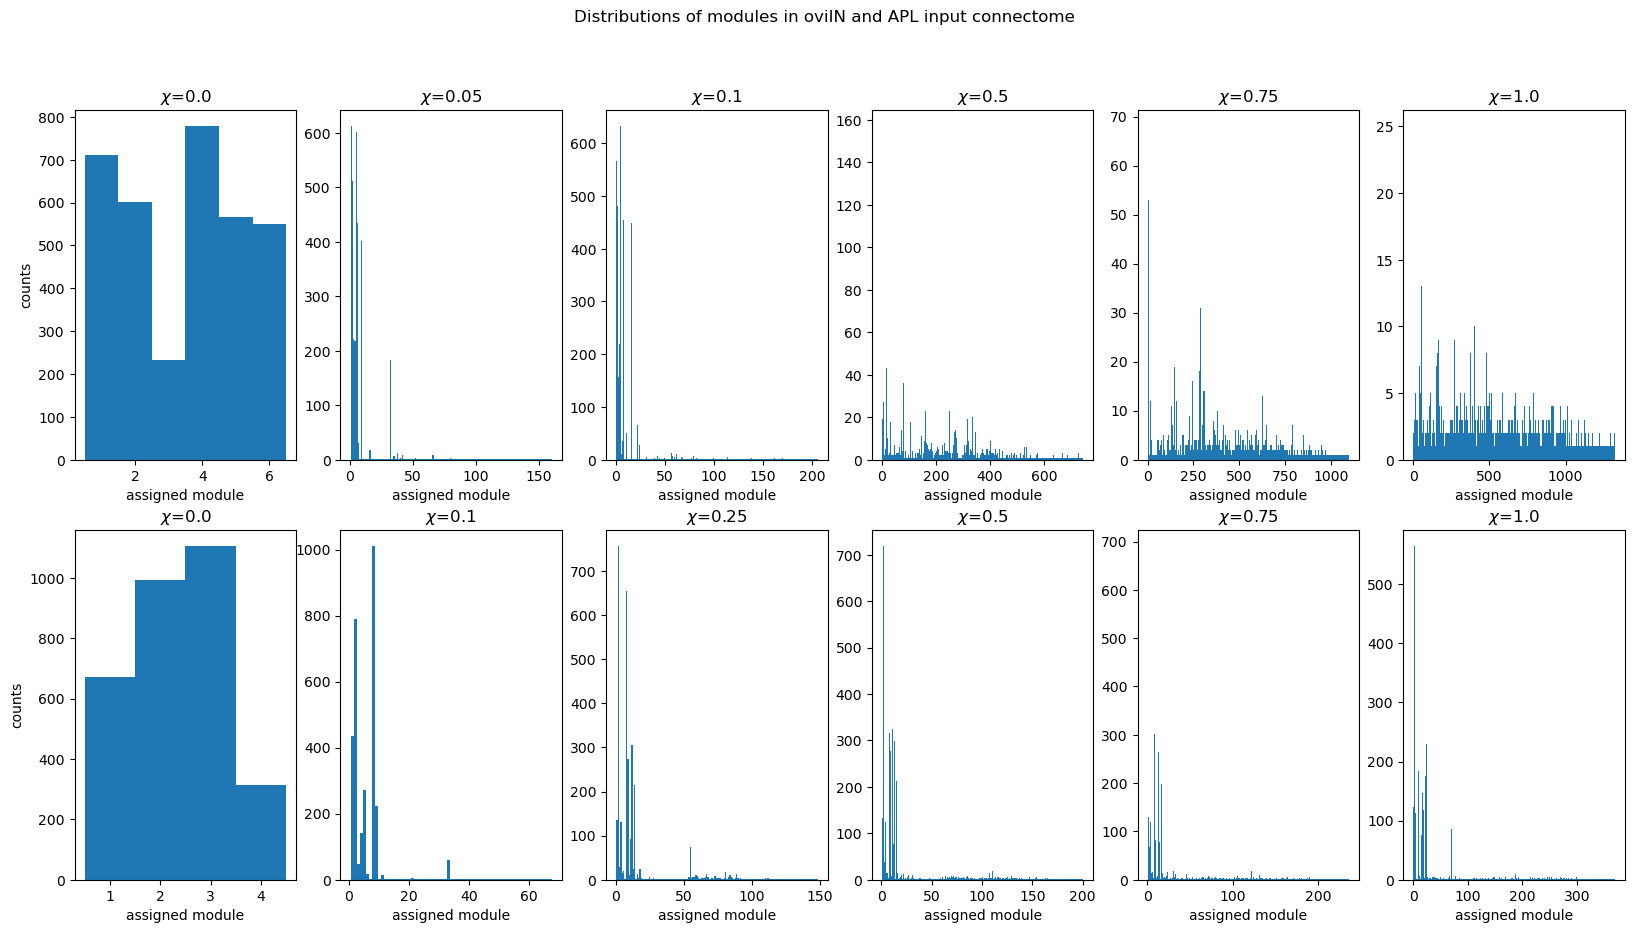

In [56]:
# Repeating for output networks
df_list_out = [ovi_node_df_out, apl_node_df_out]

# Plotting
fig, axs = plt.subplots(2, len(chi_values_ovi), figsize=(20, 10))
fig.suptitle('Distributions of modules in oviIN and APL input connectome')
for i in range(len(df_list_out)):
    for j, res in enumerate(chi_vals[i]):
        # histogram of module assignments
        axs[i, j].hist(df_list_out[i][res],bins=range(1, df_list_out[i][res].max()+2),align='left')

        axs[i, j].set_title('$\chi$=' + str(res))
        axs[i, j].set(xlabel="assigned module")
        

    axs[0, 0].set(ylabel="counts")
    axs[1, 0].set(ylabel="counts")

In [ ]:
# Analysis